#  Assignment #2  :
 The goal of this assignment is to learn about the kNN.    Implementation of kNN Algorithm using Python.


## (a) Divide the dataset as development and test. Make sure randomly divide the dataset.


In [1]:
import pandas as pd
import numpy as np
import math
import collections
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# import data IRIS dataset. https://archive.ics.uci.edu/ml/datasets/Iris 
iris = pd.read_csv("/Users/mamo/Downloads/Iris.csv")     #, header= None, index_col=False) 
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### To randomly divide the dataset 

In [3]:
iris = shuffle(iris, random_state=0)
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Type
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa


### Divide iris data to 112 points for development set and 38 points for test set  following the ratio 75:25

In [4]:
iris_dev, iris_test= iris[:112], iris[112:]

## (b) implement kNN using the following hyperparameters


## distance metric
* euclidean distance
* normalized euclidean distance
* cosine similarity


In [5]:

def euclidean_distance(x, y):          # euclidean distance
    distance = 0.0
    for i in range(len(x)):
        distance += (x[i] - y[i])**2
    return np.sqrt(distance)



def normalized_euclidean_distance(x, y):   #normalized euclidean distance
    distance = 0.0
    for i in range(len(x)):
        avg = (x[i]-y[i])/2
        distance += ((x[i]-y[i])/np.sqrt( (x[i] - avg) ** 2 + (y[i] - avg) ** 2 ) ) ** 2
    return np.sqrt(distance)



def cosine_similarityi(x, y):       # cosine similarity
    dot =0.0
    sum_x =0.0
    sum_y =0.0 
    for i in range(len(x)):   
        dot += x[i]* y[i]
        sum_x += x[i]**2
        sum_y += y[i]**2
        cos = dot / (np.sqrt(sum_x) * np.sqrt(sum_y))
    return (1- cos)   


In [6]:
# Knn using euclidean_distance 

def K_nearest_neighbor_E_D(predict, data, features, target, k):  
    row = data[features].apply(tuple,axis=1)                       # for each row convert data frame to a 4-dimensional point
    distances = row.apply(lambda x: euclidean_distance(predict,x)) # calcuate distance for the point with each row
    neighbors = list(distances.sort_values()[:k].index)           # sort all the calculated distances, and take the the k-smallest distances 
    neighbors_votes = data.loc[neighbors, target]                 # indicate the take the the k-smallest distances class votes (labels)
    vote = collections.Counter(neighbors_votes).most_common()[0][0]  # take the votes from the k nearest nighbours  
    return vote                                                      # return (the most common) the first vote as the class label 



# Knn using normalized_euclidean_distance

def K_nearest_neighbor_N_E_D(predict, data, features, target, k):    
    row = data[features].apply(list,axis=1)                       
    distances = row.apply(lambda x: normalized_euclidean_distance(predict,x)) 
    neighbors = list(distances.sort_values()[:k].index)           
    neighbors_votes = data.loc[neighbors, target]                 
    vote = collections.Counter(neighbors_votes).most_common()[0][0]  
    return vote 



# Knn using cosine similarity

def K_nearest_neighbor_C_S(predict, data, features, target, k):    
    row = data[features].apply(list,axis=1)                       
    distances = row.apply(lambda x: cosine_similarityi(predict,x)) 
    neighbors = list(distances.sort_values()[:k].index)           
    neighbors_votes = data.loc[neighbors, target]                 
    vote = collections.Counter(neighbors_votes).most_common()[0][0]  
    return vote 

## number of neighbor K 
* 1,3,5,7



In [7]:
k= [1,3,5,7] 
predict = [7.3, 2.9, 6.3, 1.8]
X = iris.columns[0:4]  #features  "Sepal_Length, Sepal_Width, Petal_Length, Petal_Width"
y = iris.columns[4]      #target  "Type"

## (c) Using the development dataset,
 * Calculate accuracy by iterating all of the development data point
* Find optimal hyperparameters
* * Draw bar charts for accuracy


In [8]:
#iris_dev

# Knn using euclidean_distance 
def all_predictions_E_D(k):
    predictions = []                        
    for row in iris.itertuples(index=False):   # for each row in dataset iterte the values in a tuple
        dict_row = row._asdict()               
        xi = []
        for column in X.values:                                     
            xi.append(dict_row[column])                            # itrate throug each feature
            result = K_nearest_neighbor_E_D(xi,iris_dev, X, y, k)  # predict each data point with the rest of the dataset 
        predictions.append(result)                                 # add the result to the predictoin list
    return predictions


# Knn using normalized_euclidean_distance
def all_predictions_N_E_D(k):
    predictions = []                        
    for row in iris.itertuples(index=False):   
        dict_row = row._asdict()               
        xi = []
        for column in X.values:                
            xi.append(dict_row[column])     
            result = K_nearest_neighbor_N_E_D(xi,iris_dev, X, y, k)
        predictions.append(result)
    return predictions


# Knn using cosine similarity
def all_predictions_C_S(k):
    predictions = []                        
    for row in iris.itertuples(index=False):   
        dict_row = row._asdict()               
        xi = []
        for column in X.values:                
            xi.append(dict_row[column])     
            result = K_nearest_neighbor_C_S(xi,iris_dev, X, y, k)
        predictions.append(result)
    return predictions

In [9]:
# Calculate the accuracy 

def accuracy_E_D(k):
    predictions = all_predictions_E_D(k)         
    correct = iris.loc[:,'Type'] == predictions   # count all the correct predictions by compare it with the actual label
    accuracy = (sum(correct)/len(predictions))*100
    return accuracy


print("euclidean_distance: \n") 

K1 = np.array([])
for i in range(len(k)): 
    print("k=",k[i],"\t",accuracy_E_D(k[i]) , "%")
    K1= np.append(K1, accuracy_E_D(k[i]))
print("\n")    
    
    
    
def accuracy_N_E_D(k):
    predictions = all_predictions_N_E_D(k)         
    correct = iris.loc[:,'Type'] == predictions   
    accuracy = (sum(correct)/len(predictions))*100
    return accuracy



print("normalized euclidean distance: \n") 

K2 =np.array([])
for i in range(len(k)): 
    print("k=",k[i],"\t",accuracy_N_E_D(k[i]) , "%") 
    K2= np.append(K2,accuracy_N_E_D(k[i]))
print("\n")    
    
    

    
def accuracy_C_S(k):
    predictions = all_predictions_C_S(k)         
    correct = iris.loc[:,'Type'] == predictions   
    accuracy = (sum(correct)/len(predictions))*100
    return accuracy


print("cosine similarity: \n") 

K3 =np.array([])
for i in range(len(k)): 
    print("k=",k[i],"\t",accuracy_C_S(k[i]) , "%") 
    K3= np.append(K3,accuracy_C_S(k[i]))

euclidean_distance: 

k= 1 	 98.66666666666667 %
k= 3 	 96.66666666666667 %
k= 5 	 97.33333333333334 %
k= 7 	 97.33333333333334 %


normalized euclidean distance: 

k= 1 	 98.0 %
k= 3 	 96.66666666666667 %
k= 5 	 96.66666666666667 %
k= 7 	 97.33333333333334 %


cosine similarity: 

k= 1 	 98.0 %
k= 3 	 98.0 %
k= 5 	 98.0 %
k= 7 	 98.0 %


(0, 130)

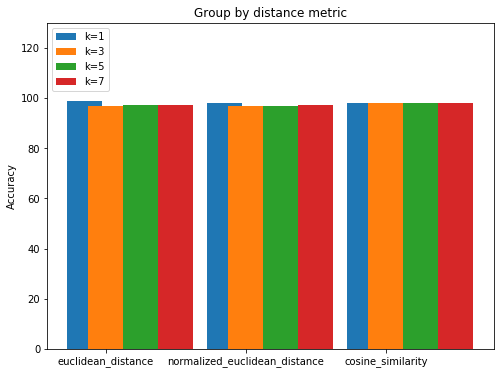

In [10]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['euclidean_distance', 'normalized_euclidean_distance', 'cosine_similarity']

k1=[K1[0],K2[0],K3[0]]
k3=[K1[1],K2[1],K3[1]]
k5=[K1[2],K2[2],K3[2]]
k7=[K1[3],K2[3],K3[3]]

data = [k1,k3,k5, k7]

X = np.arange(3)
fig = plt.figure(figsize=(8, 6))             
ax = plt.subplot(111)

ax.bar(X - 0.15, data[0], width = 0.25 ,label='k=1')
ax.bar(X + 0.00, data[1], width = 0.25 ,label='k=3')
ax.bar(X + 0.25, data[2], width = 0.25 ,label='k=5')
ax.bar(X + 0.50, data[3], width = 0.25 ,label='k=7')



ax.set_ylabel('Accuracy')
ax.set_title('Group by distance metric')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend(loc="upper left")
ax.set_ylim(0, 130,5)



(0, 125)

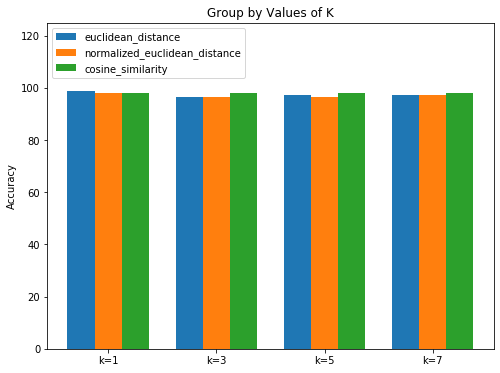

In [11]:
import numpy as np
import matplotlib.pyplot as plt


labels = ['k=1', 'k=3', 'k=5', 'k=7']

X = np.arange(4)
fig = plt.figure(figsize=(8, 6))           
ax = plt.subplot(111)
ax.bar(X - 0.25, K1, width = 0.25 ,label='euclidean_distance')
ax.bar(X + 0.00, K2, width = 0.25 ,label='normalized_euclidean_distance')
ax.bar(X + 0.25, K3, width = 0.25 ,label='cosine_similarity')


ax.set_ylabel('Accuracy')
ax.set_title('Group by Values of K')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend(loc="upper left")
ax.set_ylim(0, 125,5)   


## (d) Using the test dataset
* Use the optimal hyperparameters you found in the step c, and use it to calculate the final accuracy.  


### In our case the optimal hyperparameters we choosed for this dataset using Knn is k=7 and cosine simmilarity metric with accuracy equal to 98%

In [12]:
# iris_test

predict = [7.3, 2.9, 6.3, 1.8]
X = iris.columns[0:4]  
y = iris.columns[4]  
k = 7

K_nearest_neighbor_C_S(predict, iris_test, X, y, k)
all_predictions_C_S(k)
print("test accuracy:", accuracy_C_S(k))

test accuracy: 98.0


This dataset with mutiple hyperparamters give a very simmiler accuracy in this case we choosed the value of k= 7 which gave us accuracy = 97% using euclidean_distance and normalized euclidean distance and 98% using cosine. 
Also we choosed cosine simmilarity. 

 Refrenecs: 
    * https://arxiv.org/pdf/1708.04321.pdf
    * https://www.kaggle.com/ptdrow/k-nearest-neighbors-classifier-from-scratch/data
    * https://www.youtube.com/watch?v=GWHG3cS2PKc